# Import libraries

In [1]:
import pandas as pd
import numpy as np
from functions.model import *
from functions.vectorization import *
from functions.vocabulary import *
from functions.labelization import *

2023-09-11 08:13:35.037091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 08:13:35.446869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 08:13:35.448115: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 08:13:37.269222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Define train query

In [2]:
train_query="SELECT"

# Import id->label

In [3]:
dict_label_ids = load_dict_label_ids('../data/train/ids_labels.json')

# Import vectors

In [4]:
path_df_train = '../data/train/TRAIN_filter.json'
path_new_model = '../model/my_model_V15.h5'
df_train = pd.read_json(path_df_train)
vectorized_dataframe = load_vectorized_dataframe('../data/train/df_train_vectorized.npy')
df_train.columns = map(str.upper, df_train.columns)
train_ids = df_train['ID_PUESTO_ESCO_ULL']

# Get input dimension of model

In [5]:
vocabulary = load_vocabulary('../data/train/vocabulary.json')
input_dimension = get_vocabulary_dimension(vocabulary)

# Get output dimension of the model

In [6]:
output_dimension = get_dict_dimension(dict_label_ids)

# Create model

In [7]:
model = create_model(input_dimension, output_dimension)

# Train model

In [8]:
# Convert vectorized dataframe to np.vstack
vector_array = np.vstack(vectorized_dataframe)
train_labels_array = cast_id_to_labels(train_ids, dict_label_ids)

# Train model
model, history = model_train(model, train_query, vector_array, train_labels_array, epochs=10, batch_size=8, validation_split=0.2, verbose=1, balance_data=True)

# Save model
save_model(model, path_new_model)

2023-09-11 08:14:12.054590: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 691593552 exceeds 10% of free system memory.


Epoch 1/10
4739/4739 [==============================] - 49s 10ms/step - loss: 2.2724 - accuracy: 0.5673 - val_loss: 1.7299 - val_accuracy: 0.6365
Epoch 2/10
4739/4739 [==============================] - 32s 7ms/step - loss: 1.2930 - accuracy: 0.6873 - val_loss: 1.5897 - val_accuracy: 0.6659
Epoch 3/10
4739/4739 [==============================] - 33s 7ms/step - loss: 0.9504 - accuracy: 0.7417 - val_loss: 1.6427 - val_accuracy: 0.6798
Epoch 4/10
4739/4739 [==============================] - 32s 7ms/step - loss: 0.7443 - accuracy: 0.7813 - val_loss: 1.7218 - val_accuracy: 0.6766


/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot history

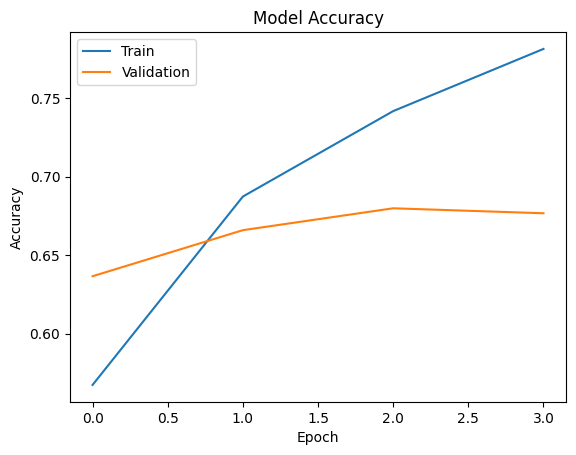

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Resume classificator

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               1368600   
                                                                 
 dense_1 (Dense)             (None, 120)               36120     
                                                                 
 dense_2 (Dense)             (None, 1016)              122936    
                                                                 
Total params: 1527656 (5.83 MB)
Trainable params: 1527656 (5.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
